This notebook uses [PyTorch](https://pytorch.org/), which is a library that can automatically differentiate functions and is commonly used to implement neural networks. Because of its capability to automatically differentiate functions, the formula for the gradient does not need to be manually derived -- this comes especially handy when working with neural networks, whose gradient formula can be quite complicated, especially for complex architectures. 

We recommend going over the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) and then the starter code below. For any new functions that you come across, you can look up the documentation [here](https://pytorch.org/docs/stable/index.html). 

We recommend running this notebook on Google Colab to avoid having to install PyTorch and to take advantage of GPUs, which make training faster.

## Load packages

In [1]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root="C:\\Users\\chara\\OneDrive\\Desktop\\ML Course\\Assignment 3\\data",  train=True,download=True, transform=transform)

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

# import sys
# sys.path.insert(1, path_prefix)

## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [3]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                in_features = 28 * 28
                hidden_features = 1024
                out_features = output_size
                self.encoder = nn.Sequential(
                    nn.Linear(in_features=in_features, out_features=hidden_features),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_features, out_features=out_features)
                )

            def forward(self, x):
                # needs your implementation
                input_dimension = x.shape
                x = x.reshape(-1, input_dimension[2] * input_dimension[3])
                x = self.encoder(x)
                return x

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                in_features = input_size
                hidden_features = 1024
                out_features = 28 * 28
                self.decoder = nn.Sequential(
                    nn.Linear(in_features=in_features, out_features=hidden_features),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_features, out_features=out_features),
                    nn.Sigmoid()
                )

            def forward(self, z):
                # needs your implementation
                z = self.decoder(z)
                return z.reshape(-1, 1, 28, 28)

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [15]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 5e-4
EPOCH_NUMBER= 30 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|██████████| 1875/1875 [00:08<00:00, 221.81it/s]


====> Epoch: 1 Average loss: 0.7024


100%|██████████| 313/313 [00:01<00:00, 168.02it/s]


====> Val set loss (reconstruction error) : 0.6881


100%|██████████| 1875/1875 [00:08<00:00, 231.16it/s]


====> Epoch: 2 Average loss: 0.6768


100%|██████████| 313/313 [00:01<00:00, 165.97it/s]


====> Val set loss (reconstruction error) : 0.6806


100%|██████████| 1875/1875 [00:08<00:00, 228.98it/s]


====> Epoch: 3 Average loss: 0.6718


100%|██████████| 313/313 [00:01<00:00, 166.14it/s]


====> Val set loss (reconstruction error) : 0.6769


100%|██████████| 1875/1875 [00:08<00:00, 231.08it/s]


====> Epoch: 4 Average loss: 0.6688


100%|██████████| 313/313 [00:01<00:00, 166.43it/s]


====> Val set loss (reconstruction error) : 0.6751


100%|██████████| 1875/1875 [00:08<00:00, 227.63it/s]


====> Epoch: 5 Average loss: 0.6672


100%|██████████| 313/313 [00:01<00:00, 166.65it/s]


====> Val set loss (reconstruction error) : 0.6736


100%|██████████| 1875/1875 [00:08<00:00, 222.99it/s]


====> Epoch: 6 Average loss: 0.6657


100%|██████████| 313/313 [00:01<00:00, 170.55it/s]


====> Val set loss (reconstruction error) : 0.6724


100%|██████████| 1875/1875 [00:08<00:00, 226.07it/s]


====> Epoch: 7 Average loss: 0.6647


100%|██████████| 313/313 [00:01<00:00, 165.39it/s]


====> Val set loss (reconstruction error) : 0.6720


100%|██████████| 1875/1875 [00:08<00:00, 223.25it/s]


====> Epoch: 8 Average loss: 0.6638


100%|██████████| 313/313 [00:01<00:00, 166.49it/s]


====> Val set loss (reconstruction error) : 0.6714


100%|██████████| 1875/1875 [00:08<00:00, 227.12it/s]


====> Epoch: 9 Average loss: 0.6630


100%|██████████| 313/313 [00:01<00:00, 165.20it/s]


====> Val set loss (reconstruction error) : 0.6701


100%|██████████| 1875/1875 [00:08<00:00, 227.29it/s]


====> Epoch: 10 Average loss: 0.6624


100%|██████████| 313/313 [00:01<00:00, 172.46it/s]


====> Val set loss (reconstruction error) : 0.6693


100%|██████████| 1875/1875 [00:08<00:00, 229.73it/s]


====> Epoch: 11 Average loss: 0.6617


100%|██████████| 313/313 [00:01<00:00, 165.30it/s]


====> Val set loss (reconstruction error) : 0.6694


100%|██████████| 1875/1875 [00:08<00:00, 225.59it/s]


====> Epoch: 12 Average loss: 0.6610


100%|██████████| 313/313 [00:01<00:00, 162.64it/s]


====> Val set loss (reconstruction error) : 0.6690


100%|██████████| 1875/1875 [00:08<00:00, 218.14it/s]


====> Epoch: 13 Average loss: 0.6606


100%|██████████| 313/313 [00:01<00:00, 167.19it/s]


====> Val set loss (reconstruction error) : 0.6684


100%|██████████| 1875/1875 [00:08<00:00, 228.11it/s]


====> Epoch: 14 Average loss: 0.6601


100%|██████████| 313/313 [00:01<00:00, 167.64it/s]


====> Val set loss (reconstruction error) : 0.6686


100%|██████████| 1875/1875 [00:08<00:00, 228.67it/s]


====> Epoch: 15 Average loss: 0.6598


100%|██████████| 313/313 [00:01<00:00, 173.89it/s]


====> Val set loss (reconstruction error) : 0.6680


100%|██████████| 1875/1875 [00:08<00:00, 228.31it/s]


====> Epoch: 16 Average loss: 0.6593


100%|██████████| 313/313 [00:01<00:00, 168.82it/s]


====> Val set loss (reconstruction error) : 0.6674


100%|██████████| 1875/1875 [00:08<00:00, 228.23it/s]


====> Epoch: 17 Average loss: 0.6589


100%|██████████| 313/313 [00:01<00:00, 172.30it/s]


====> Val set loss (reconstruction error) : 0.6679


100%|██████████| 1875/1875 [00:08<00:00, 224.48it/s]


====> Epoch: 18 Average loss: 0.6586


100%|██████████| 313/313 [00:01<00:00, 168.54it/s]


====> Val set loss (reconstruction error) : 0.6677


100%|██████████| 1875/1875 [00:08<00:00, 219.75it/s]


====> Epoch: 19 Average loss: 0.6583


100%|██████████| 313/313 [00:01<00:00, 164.24it/s]


====> Val set loss (reconstruction error) : 0.6679


100%|██████████| 1875/1875 [00:08<00:00, 229.09it/s]


====> Epoch: 20 Average loss: 0.6580


100%|██████████| 313/313 [00:01<00:00, 166.26it/s]


====> Val set loss (reconstruction error) : 0.6676


100%|██████████| 1875/1875 [00:08<00:00, 227.08it/s]


====> Epoch: 21 Average loss: 0.6576


100%|██████████| 313/313 [00:01<00:00, 169.15it/s]


====> Val set loss (reconstruction error) : 0.6664


100%|██████████| 1875/1875 [00:08<00:00, 227.87it/s]


====> Epoch: 22 Average loss: 0.6574


100%|██████████| 313/313 [00:01<00:00, 165.48it/s]


====> Val set loss (reconstruction error) : 0.6666


100%|██████████| 1875/1875 [00:08<00:00, 222.78it/s]


====> Epoch: 23 Average loss: 0.6573


100%|██████████| 313/313 [00:01<00:00, 162.32it/s]


====> Val set loss (reconstruction error) : 0.6668


100%|██████████| 1875/1875 [00:08<00:00, 228.40it/s]


====> Epoch: 24 Average loss: 0.6569


100%|██████████| 313/313 [00:01<00:00, 167.79it/s]


====> Val set loss (reconstruction error) : 0.6666


100%|██████████| 1875/1875 [00:08<00:00, 233.08it/s]


====> Epoch: 25 Average loss: 0.6566


100%|██████████| 313/313 [00:01<00:00, 164.69it/s]


====> Val set loss (reconstruction error) : 0.6660


100%|██████████| 1875/1875 [00:08<00:00, 224.43it/s]


====> Epoch: 26 Average loss: 0.6565


100%|██████████| 313/313 [00:01<00:00, 169.31it/s]


====> Val set loss (reconstruction error) : 0.6663


100%|██████████| 1875/1875 [00:08<00:00, 221.79it/s]


====> Epoch: 27 Average loss: 0.6560


100%|██████████| 313/313 [00:01<00:00, 161.05it/s]


====> Val set loss (reconstruction error) : 0.6654


100%|██████████| 1875/1875 [00:08<00:00, 224.16it/s]


====> Epoch: 28 Average loss: 0.6558


100%|██████████| 313/313 [00:01<00:00, 164.96it/s]


====> Val set loss (reconstruction error) : 0.6653


100%|██████████| 1875/1875 [00:08<00:00, 226.91it/s]


====> Epoch: 29 Average loss: 0.6557


100%|██████████| 313/313 [00:01<00:00, 161.74it/s]


====> Val set loss (reconstruction error) : 0.6650


100%|██████████| 1875/1875 [00:08<00:00, 218.53it/s]


====> Epoch: 30 Average loss: 0.6556


100%|██████████| 313/313 [00:01<00:00, 166.07it/s]

====> Val set loss (reconstruction error) : 0.6663


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

(10000, 2)


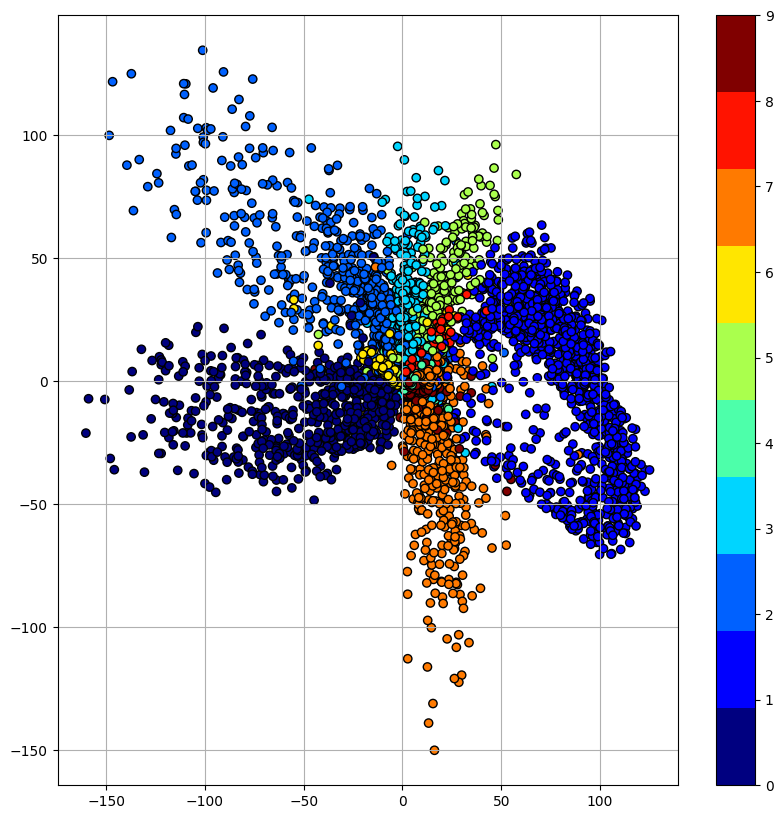

In [18]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
print(z.shape)
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


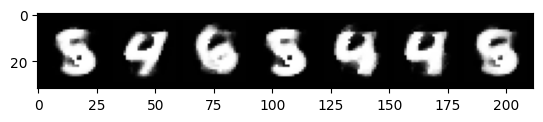

In [25]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

Original images


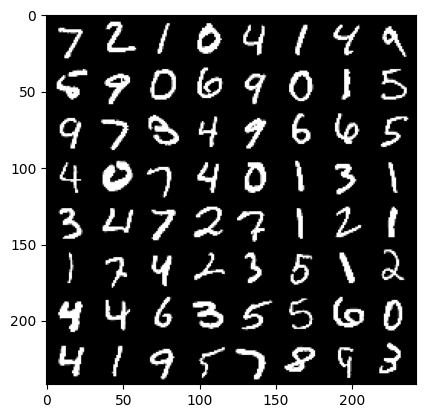

In [26]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


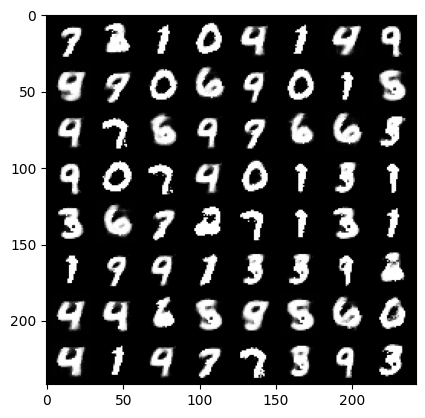

In [28]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)